In [ ]:
!pip3 install autokeras 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 8.0 MB/s 
     |████████████████████████████████| 135 kB 61.4 MB/s 
     |████████████████████████████████| 1.6 MB 52.9 MB/s 


In [ ]:

import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


LOADING DATA

In [ ]:
TrainDataSet= load_breast_cancer()
df = pd.DataFrame(data=TrainDataSet.data, columns=TrainDataSet.feature_names)
df['target'] = TrainDataSet.target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df[df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


EXPLORATORY DATA ANALYSIS OF BC

In [ ]:
pd.DataFrame(df.corr().unstack().sort_values().drop_duplicates())

0
target          worst concave points -0.793566
worst perimeter target               -0.782914
target          mean concave points  -0.776614
worst radius    target               -0.776454
mean perimeter  target               -0.742636
...                                        ...
                mean area             0.986507
mean radius     mean area             0.987357
worst perimeter worst radius          0.993708
mean perimeter  mean radius           0.997855
mean radius     mean radius           1.000000

[466 rows x 1 columns]

In [ ]:
for i in df.columns:
    fig = px.histogram(df, 
                   x=i, 
                   marginal='box', 
                   text_auto=True,
                   color_discrete_sequence  = ['lightblue'],
                   template='simple_white',
                   title=i.upper() + ' Histogram')

    fig.update_layout(xaxis_title=i,yaxis_title="Count", bargap=0.1)
    
    fig.show()

In [ ]:
fig = px.histogram(df, 
                   x='target',
                   color = 'target',
                   text_auto=True,
                   color_discrete_sequence=px.colors.qualitative.G10,
                   template='simple_white',
                   labels={"target": "Target"},
                   title='Target Value Count')

fig.update_layout(bargap=0.1, xaxis_title="Target",yaxis_title="Count")

fig.show()

**DATA** CLEANING

In [ ]:
input_cols = df.columns[:-1]
input_cols

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
target_col =  df.columns[-1]
target_col

'target'

In [ ]:
inputs_df = df[list(input_cols)].copy()
inputs_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
targets = df[(target_col)]
targets

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [ ]:
df.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


AUTOML MODEL

In [ ]:
import tensorflow as tf
import os
from sklearn.datasets import load_files
import autokeras as ak

In [ ]:
#separo datps de las etiquetas de los resultados


x = df.drop(['target'],axis=1)

y = np.array(df['target'])


#separo datos en trainig y test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

x_train = np.array(X_train)
y_train = np.array(y_train)
x_test = np.array(X_test)
y_test = np.array(y_test)



print(x_train,y_train)

[[9.755e+00 2.820e+01 6.168e+01 ... 4.866e-02 2.321e-01 7.211e-02]
 [2.031e+01 2.706e+01 1.329e+02 ... 1.697e-01 3.151e-01 7.999e-02]
 [1.979e+01 2.512e+01 1.304e+02 ... 1.732e-01 3.305e-01 8.465e-02]
 ...
 [1.095e+01 2.135e+01 7.190e+01 ... 1.424e-01 2.964e-01 9.606e-02]
 [1.330e+01 2.157e+01 8.524e+01 ... 5.614e-02 2.637e-01 6.658e-02]
 [9.731e+00 1.534e+01 6.378e+01 ... 1.571e-01 3.108e-01 1.259e-01]] [1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1
 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1
 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 

In [ ]:
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3]) 

(455, 30)
(455,)
[1 0 0]


In [ ]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True, max_trials=3
)  # It tries 3 different models.
# Feed the structured data classifier with training data.
history = clf.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
# Predict with the best model.
#predicted_y = clf.predict(x_test)
#print(predicted_y)
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.9649122953414917

Best val_accuracy So Far: 0.9649122953414917
Total elapsed time: 00h 00m 07s
Epoch 1/10
15/15 [==============================] - 1s 15ms/step - loss: 0.2749 - accuracy: 0.9187 - val_loss: 0.6225 - val_accuracy: 0.9386
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 0.2159 - accuracy: 0.9582 - val_loss: 0.7480 - val_accuracy: 0.9474
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.0865 - accuracy: 0.9802 - val_loss: 0.1839 - val_accuracy: 0.9386
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0393 - accuracy: 0.9846 - val_loss: 0.2962 - val_accuracy: 0.9474
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9868 - val_loss: 0.7523 - val_accuracy: 0.9474
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9824 - val_loss: 0.2348 - val_accuracy: 0.9737
Epoch 7/10
15/15 

evaluar red

In [ ]:
res = clf.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 1.6286 - accuracy: 0.9561


Predecir nuevos resultados

In [ ]:
y_pred = clf.predict(x_test)

for i in range(50):
  print("valor real: ", y_test[i])
  print("valor estimado: ", y_pred[i])
  print("---------------------------------- ")

4/4 [==============================] - 0s 2ms/step
valor real:  0
valor estimado:  [0.]
---------------------------------- 
valor real:  0
valor estimado:  [0.]
---------------------------------- 
valor real:  1
valor estimado:  [1.]
---------------------------------- 
valor real:  1
valor estimado:  [1.]
---------------------------------- 
valor real:  1
valor estimado:  [1.]
---------------------------------- 
valor real:  1
valor estimado:  [1.]
---------------------------------- 
valor real:  1
valor estimado:  [1.]
---------------------------------- 
valor real:  0
valor estimado:  [0.]
---------------------------------- 
valor real:  1
valor estimado:  [1.]
---------------------------------- 
valor real:  1
valor estimado:  [1.]
---------------------------------- 
valor real:  0
valor estimado:  [0.]
---------------------------------- 
valor real:  1
valor estimado:  [1.]
---------------------------------- 
valor real:  1
valor estimado:  [1.]
---------------------------------- 


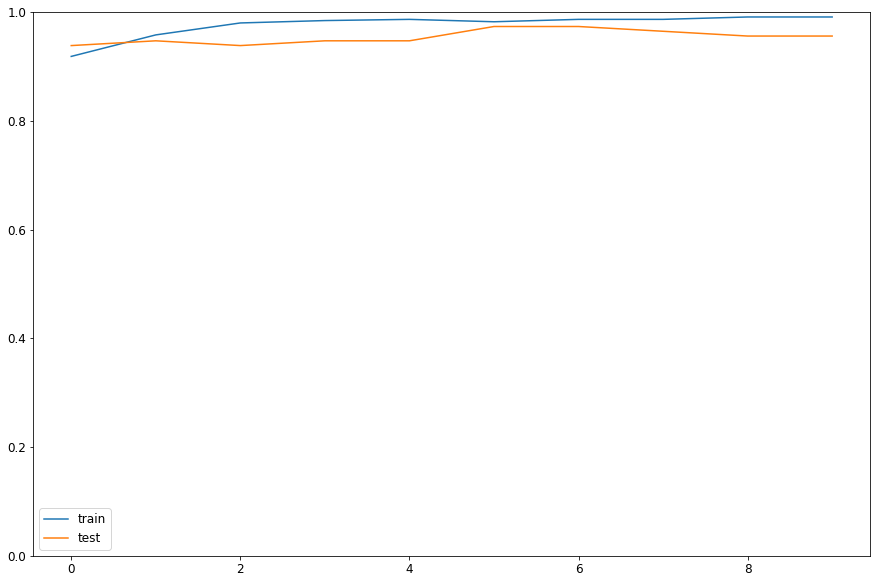

In [ ]:
from matplotlib import pyplot
f, ax = pyplot.subplots()
ax.set_ylim(bottom=0)
ax.plot(history.history['accuracy'], label='train')
ax.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show(f)